**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
# Importing the necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\arany\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset

In [3]:
books.shape

(271360, 8)

In [4]:
users.shape

(278858, 3)

In [5]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [6]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [7]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'], axis=1, inplace=True)

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [9]:
books['yearOfPublication'].value_counts()

2002         13903
2001         13715
1999         13414
2000         13373
1998         12116
2003         11610
1997         11494
1996         10687
1995         10259
1994          8857
1993          7920
1992          7390
1991          6926
1990          6394
1989          5825
1988          5545
1987          4761
2004          4629
1986          4258
1999          4017
1985          3912
2000          3859
2002          3724
1998          3650
2001          3644
1984          3631
0             3570
1997          3396
1996          3343
1983          3297
             ...  
1906             1
1931             1
2020             1
1919             1
1900             1
1917             1
1930             1
1924             1
1938             1
2024             1
1806             1
1926             1
Gallimard        1
1924             1
2008             1
1944             1
2037             1
2011             1
2021             1
2026             1
2038             1
1934        

In [10]:
print (books['yearOfPublication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [11]:
drop_row1=books.loc[books.yearOfPublication == 'DK Publishing Inc'].index

In [12]:
drop_row2=books.loc[books.yearOfPublication == 'Gallimard'].index

### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [13]:
books.shape

(271360, 5)

In [14]:
books.drop(drop_row1,inplace = True)
books.drop(drop_row2,inplace = True)
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [15]:
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='raise')

In [16]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [17]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [18]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [19]:
books.shape

(271357, 5)

In [20]:
mod_books = books.drop([books.index[128890] , books.index[129037]])

In [21]:
mod_books.shape

(271355, 5)

## Exploring Users dataset

In [22]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [23]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [25]:
count = users["Age"].isna().sum()

In [26]:
print(count)

110762


In [27]:
110762+168096

278858

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [28]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [29]:
print(count)

110762


In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         166784 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [31]:
166784+112074

278858

### Replace null values in column `Age` with mean

In [32]:
users['Age'].fillna(users['Age'].median(), inplace = True)

In [33]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Change the datatype of `Age` to `int`

In [34]:
users['Age'] = users['Age'].astype('int64')

In [35]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [36]:
ratings.shape

(1149780, 3)

In [37]:
n_users = users.shape[0]
n_books = books.shape[0]

In [38]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [39]:
ratings_mod = ratings[ratings.ISBN.isin(books.ISBN)]

In [40]:
ratings_mod.shape

(1031132, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [41]:
ratings_mod= ratings_mod[ratings_mod.userID.isin(users.userID)]
ratings_mod.shape

(1031132, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [42]:
ratings_valid = ratings_mod[ratings_mod.bookRating != 0]
ratings_valid.shape

(383841, 3)

### Find out which rating has been given highest number of times

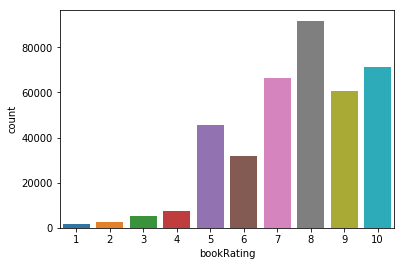

In [43]:
sns.countplot(data = ratings_valid, x = 'bookRating')

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [44]:
ratings_count=ratings_valid['userID'].value_counts()

In [45]:
ratings_new = ratings_valid[ratings_valid['userID'].isin(ratings_count[ratings_count >= 100].index)]

In [46]:
ratings_new['bookRating'].describe()

count    103271.000000
mean          7.825420
std           1.819968
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: bookRating, dtype: float64

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [47]:
ratings_matrix = ratings_new.pivot(index='userID', columns = 'ISBN', values = 'bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66574)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
ratings_matrix.fillna(0, inplace=True)
ratings_matrix.head()
ratings_matrix = ratings_matrix.astype(np.int64)
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [49]:
from surprise import SVD
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Trainset
from surprise import Reader
from surprise import accuracy
from collections import defaultdict

In [50]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_new, reader)

In [51]:
trainset = data.build_full_trainset()

algo = SVD(n_factors = 50)
algo.fit(trainset)

In [52]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0),
              (1, 8.0),
              (2, 10.0),
              (3, 7.0),
              (4, 9.0),
              (5, 8.0),
              (6, 8.0),
              (7, 6.0),
              (8, 8.0),
              (9, 7.0),
              (10, 8.0),
              (11, 10.0),
              (12, 10.0),
              (13, 10.0),
              (14, 8.0),
              (15, 8.0),
              (16, 10.0),
              (17, 9.0),
              (18, 9.0),
              (19, 8.0),
              (20, 9.0),
              (21, 9.0),
              (22, 9.0),
              (23, 9.0),
              (24, 9.0),
              (25, 8.0),
              (26, 8.0),
              (27, 7.0),
              (28, 7.0),
              (29, 7.0),
              (30, 10.0),
              (31, 9.0),
              (32, 8.0),
              (33, 9.0),
              (34, 8.0),
              (35, 9.0),
              (36, 7.0),
              (37, 5.0),
              (38, 7.0),
       

In [53]:
print("Users, Factors") 
algo.pu.shape

Users, Factors


(449, 50)

In [54]:
testset = trainset.build_anti_testset()

predictions = algo.test(testset)


In [58]:
predictions

[Prediction(uid=277427, iid='0006542808', r_ui=7.825420495589275, est=7.9910140083848615, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0060392185', r_ui=7.825420495589275, est=8.534893845437445, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0140367209', r_ui=7.825420495589275, est=8.520805323348865, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0140546499', r_ui=7.825420495589275, est=8.471724910512334, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0192816071', r_ui=7.825420495589275, est=8.45492006142275, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0307022196', r_ui=7.825420495589275, est=8.41901068521583, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0310912520', r_ui=7.825420495589275, est=8.72854040107469, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0312850131', r_ui=7.825420495589275, est=8.269707234945486, details={'was_impossible': False}),
 P

In [59]:
accuracy.rmse(predictions)
accuracy

RMSE: 0.9925


<module 'surprise.accuracy' from 'C:\\Users\\arany\\Anaconda3\\lib\\site-packages\\surprise\\accuracy.py'>

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [60]:
userID = 2110

In [56]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [61]:
def get_top_n(predictions, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [62]:
top_n = get_top_n(predictions, n=10)

In [63]:
print("10 books with their predicted ratings : ISBN, Pred Rating")
print(top_n[userID])

10 books with their predicted ratings : ISBN, Pred Rating
[('0385492081', 9.66997115749272), ('0064471047', 9.6017011705504), ('0345342968', 9.58536054464608), ('0618002227', 9.529588443331953), ('0312924585', 9.518162357088402), ('0877017883', 9.495241094484452), ('0743227441', 9.468948765580455), ('0439136369', 9.465427919603911), ('0064400557', 9.457261159003153), ('0394800168', 9.44814033305323)]


### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [64]:
user2110_data = ratings_new[ratings_new.userID == userID]

In [65]:
user2110_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [67]:
user2110_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [68]:
user_ISBN = user2110_data['ISBN']
book_data = books[books.ISBN.isin(user_ISBN)]

In [69]:
book_data.shape

(103, 5)

In [70]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [71]:
user_full_info = pd.merge(user2110_data, book_data, on='ISBN')

In [72]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [73]:
pred_books = top_n[userID]
rec_ISBN = list()

In [76]:
for (iid, _) in pred_books:
    rec_ISBN.append(iid);

In [75]:
print("Recommended Books for UserID : 2110 are the following;")
rec_books = books[books.ISBN.isin(rec_ISBN)]
print(rec_books)

Recommended Books for UserID : 2110 are the following;
             ISBN                                          bookTitle  \
1908   0385492081  Into Thin Air : A Personal Account of the Mt. ...   
2230   0345342968                                     Fahrenheit 451   
3847   0064400557                   Charlotte's Web (Trophy Newbery)   
4479   0312924585                               Silence of the Lambs   
6330   0439136369  Harry Potter and the Prisoner of Azkaban (Book 3)   
8406   0743227441                              The Other Boleyn Girl   
9727   0064471047  The Lion, the Witch, and the Wardrobe (The Chr...   
12763  0618002227  The Fellowship of the Ring (The Lord of the Ri...   
19640  0877017883  Griffin &amp; Sabine: An Extraordinary Corresp...   
21742  0394800168  Green Eggs and Ham (I Can Read It All by Mysel...   

             bookAuthor  yearOfPublication  \
1908       JON KRAKAUER               1998   
2230       RAY BRADBURY               1987   
3847        E.